In [1]:
import pandas as pd
import geopandas as gpd
import geoplot

In [2]:
gdf = gpd.read_file("ATLAS/reference-regions/IPCC-WGI-reference-regions-v4.geojson")
gdf = gdf.set_index("Acronym")
data = pd.read_csv("test")

tas_means = data[["region", "tas"]].groupby(["region"]).mean()
pr_means  = data[["region", "pr"]].groupby(["region"]).mean()

/home/zequi/miniconda3/lib/python3.9/site-packages/geoplot/geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(
/home/zequi/miniconda3/lib/python3.9/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

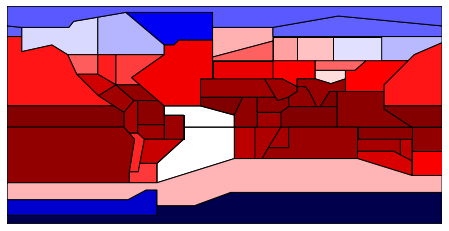

In [3]:
geoplot.choropleth(gdf, hue=tas_means["tas"], cmap='seismic', figsize=(8,4))

<AxesSubplot:>

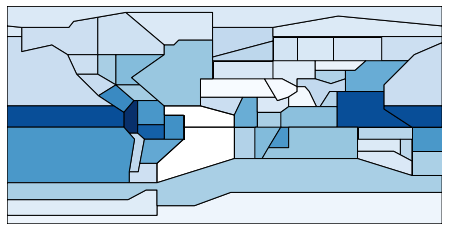

In [4]:
geoplot.choropleth(gdf, hue=pr_means["pr"], cmap='Blues', figsize=(8,4))